## 1. Creating a complete dataframe of all the variables

First, we create a merged dataframe of existing columns of data.

Please create a folder called 'data' in the directory that this jupyter notebook is in. Then, go to 'https://github.com/sophie-hy-fung/spain-bretton-woods/tree/main/data' and download 'Spain_Bretton_Woods_Data.xlsx' and 'US_Bretton_Woods_Data.xlsx' into the 'data' folder.

In [3]:
#importing necessary libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
#import Spain and US data
spain_df= pd.read_excel("data/Spain_Bretton_Woods_Data.xlsx", header = 1)
us_df = pd.read_excel("data/US_Bretton_Woods_Data.xlsx", header = 1)

In [5]:
#shorten column names and differentiate US data from Spain data
spain_df=spain_df.rename(columns={'Unnamed: 0':'Month','Economic Activity, Industrial Production, Index': 'Industrial_Production', 'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate':'Nom_Exchange_Rate', 'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':
                      'Spain_International_Reserves', 'Prices, Consumer Price Index, All items, Index':'Spain_CPI'})
us_df=us_df.rename(columns={'Unnamed: 0':'Month', 'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':
                      'US_International_Reserves', 'Prices, Consumer Price Index, All items, Index':'US_CPI'})

In [6]:
#merge Spain and US dataframes using month as key
sp_us_df=pd.merge(spain_df, us_df, on='Month')

Then, we generate new variables.

In [7]:
#The monthly growth in the nominal exchange rate
sp_us_df['Nom_Exchange_Rate_Monthly_Growth']=sp_us_df['Nom_Exchange_Rate'].pct_change()*100

#The real exchange rate
#Since the nominal exchange rate is in terms of US dollar, we divide by the CPI of Spain and multiply by the CPI of the US.
#This is the real exchange rate of Spain, which is how many a Spanish peseta can buy in Spain relative to how many goods it could buy in the US after being exchanged into USD.
sp_us_df['Real_Exchange_Rate']=sp_us_df['Nom_Exchange_Rate']*sp_us_df['US_CPI']/sp_us_df['Spain_CPI']

#The monthly growth in the real exchange rate
#This is calculated by taking the monthly percentage change in the real exchange rate
sp_us_df['Real_Exchange_Rate_Monthly_Growth']=sp_us_df['Real_Exchange_Rate'].pct_change()*100

#The monthly inflation rate of Spain
sp_us_df['Spain_Monthly_Inflation']=sp_us_df['Spain_CPI'].pct_change()*100

In [8]:
#The monthly growth in industrial production
sp_us_df['Industrial_Production_Monthly_Growth']=sp_us_df['Industrial_Production'].pct_change()*100

#The growth in industrial production versus 12 months ago
sp_us_df['Industrial_Production_12_Monthly_Growth']=sp_us_df['Industrial_Production'].pct_change(periods=12)*100

#An index of the value of Spain's international reserves (value of reserves at January 1960 = 100))
sp_us_df['Spain_International_Reserves_Index']=sp_us_df['Spain_International_Reserves']/sp_us_df['Spain_International_Reserves'][0]*100


In [9]:
#The monthly inflation rate of the US
sp_us_df['US_Monthly_Inflation']=sp_us_df['US_CPI'].pct_change()*100

#An index of the value of the US's international reserves(value of reserves at January 1960 = 100))
sp_us_df['US_International_Reserves_Index']=sp_us_df['US_International_Reserves']/sp_us_df['US_International_Reserves'][0]*100

#The difference between the inflation rate of Spain and the US
sp_us_df['Inflation_Difference']=sp_us_df['Spain_Monthly_Inflation']-sp_us_df['US_Monthly_Inflation']

Finally, we change the format of months from string to datetime.

In [10]:
#change date format from string to datetime

dict={'Jan': 1,
      'Feb': 2,
      'Mar': 3,
      'Apr': 4,
      'May': 5,
      'Jun': 6,
      'Jul': 7,
      'Aug': 8,
      'Sep': 9,
      'Oct': 10,
      'Nov': 11,
      'Dec': 12}

months=[]

for i in range(len(sp_us_df)):
    str_month=sp_us_df['Month'][i].split(" ")[0]
    month=dict[str_month]
    year=int(sp_us_df['Month'][i].split(" ")[1])
    months.append(datetime.datetime(year, month, 1))

sp_us_df['Month']=months


## 2. Plotting figures

<function matplotlib.pyplot.show(close=None, block=None)>

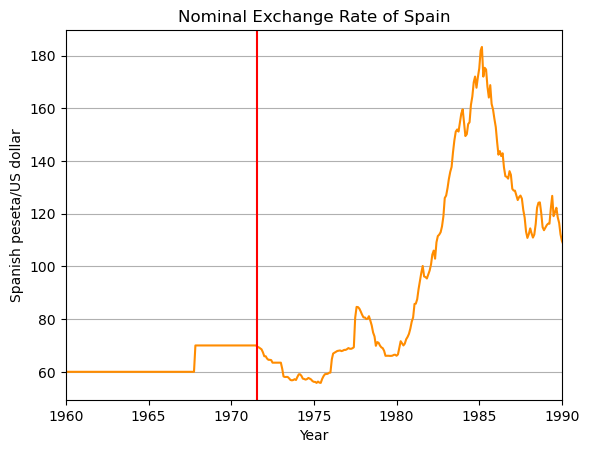

In [49]:
#plotting the nominal exchange rate
plt.plot(sp_us_df['Month'], sp_us_df['Nom_Exchange_Rate'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.xlabel('Year')
plt.ylabel('Spanish peseta/US dollar')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 1, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.title('Nominal Exchange Rate of Spain')
plt.savefig('figures/Nom_Exchange_Rate.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

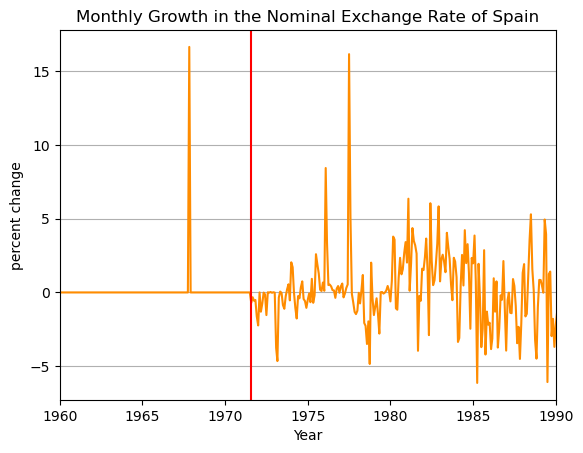

In [60]:
#plotting the monthly growth in nominal exchange rate
plt.plot(sp_us_df['Month'], sp_us_df['Nom_Exchange_Rate_Monthly_Growth'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.xlabel('Year')
plt.ylabel('percent change')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 1, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.title('Monthly Growth in the Nominal Exchange Rate of Spain')
plt.savefig('figures/Monthly_Growth_in_Nom_Exchange_Rate.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

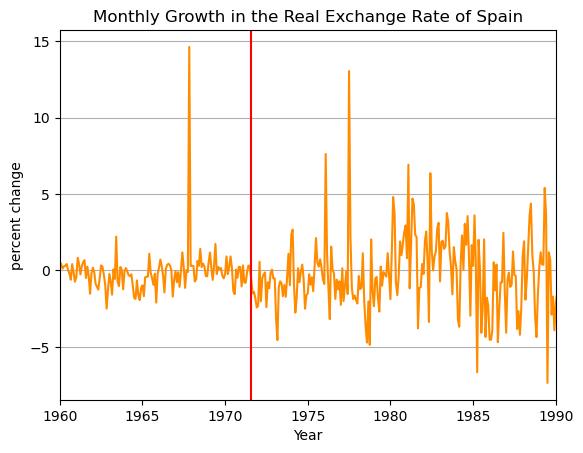

In [59]:
#plotting the monthly growth in real exchange rate
plt.plot(sp_us_df['Month'], sp_us_df['Real_Exchange_Rate_Monthly_Growth'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 1, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.title('Monthly Growth in the Real Exchange Rate of Spain')
plt.xlabel('Year')
plt.ylabel('percent change')
plt.savefig('figures/Monthly_Growth_in_Real_Exchange_Rate.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

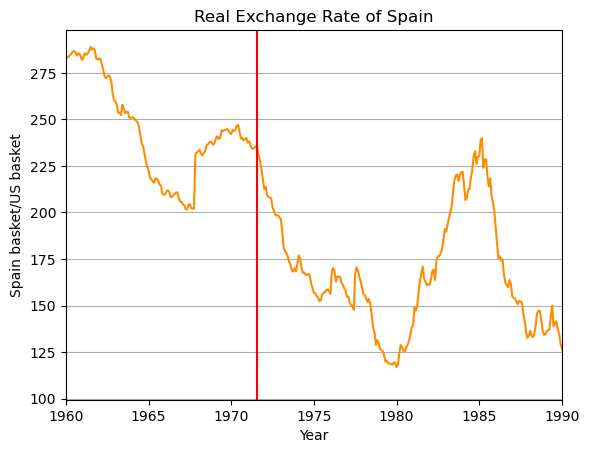

In [61]:
#plotting the real exchange rate
plt.plot(sp_us_df['Month'], sp_us_df['Real_Exchange_Rate'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Real Exchange Rate of Spain')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 1, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.xlabel('Year')
plt.ylabel('Spain basket/US basket')
plt.savefig('figures/Real_Exchange_Rate.png', bbox_inches='tight')
plt.show

In [15]:
#create a dataframe of the data until the exit of the US from Bretton Woods
shortened_df=sp_us_df[sp_us_df['Month']<datetime.datetime(1973, 1, 1)]

<function matplotlib.pyplot.show(close=None, block=None)>

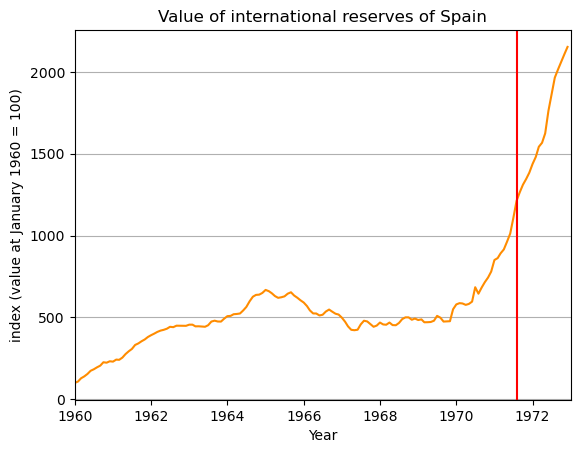

In [54]:
#plotting the international reserves index of Spain
plt.plot(shortened_df['Month'], shortened_df['Spain_International_Reserves_Index'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Value of international reserves of Spain')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1973, 1, 1))
plt.xlabel('Year')
plt.ylabel('index (value at January 1960 = 100)')
plt.savefig('figures/Spain_International_Reserves_Index.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

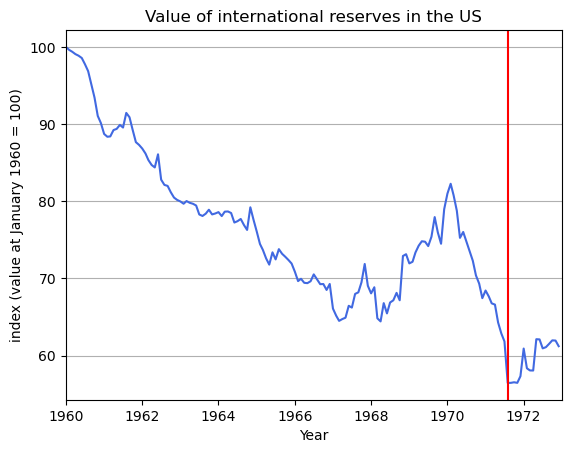

In [58]:
#plotting the international reserves index of the US
plt.plot(shortened_df['Month'], shortened_df['US_International_Reserves_Index'], color='royalblue')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Value of international reserves in the US')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1973, 1, 1))
plt.xlabel('Year')
plt.ylabel('index (value at January 1960 = 100)')
plt.savefig('figures/US_International_Reserves_Index.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

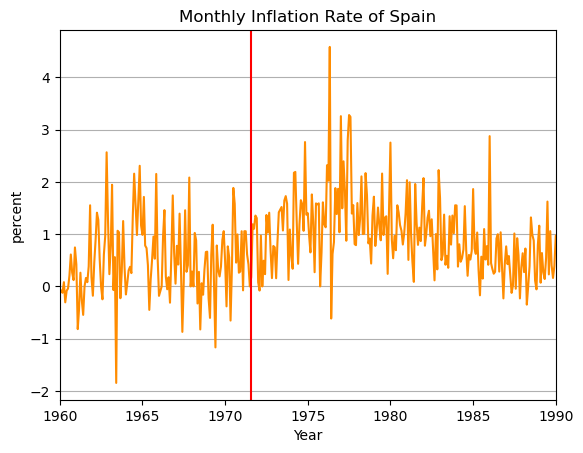

In [63]:
#plotting the monthly inflation rate of Spain
plt.plot(sp_us_df['Month'], sp_us_df['Spain_Monthly_Inflation'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Monthly Inflation Rate of Spain')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 1, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.xlabel('Year')
plt.ylabel('percent')
plt.savefig('figures/Spain_Monthly_Inflation.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

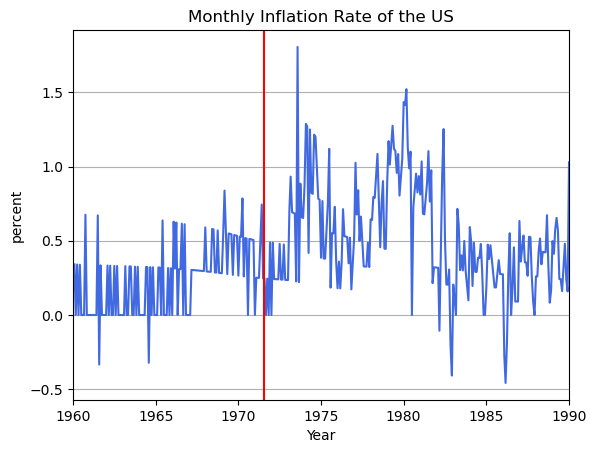

In [66]:
#plotting the monthly inflation rate of the US
plt.plot(sp_us_df['Month'], sp_us_df['US_Monthly_Inflation'], color='royalblue')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Monthly Inflation Rate of the US')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 1, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.xlabel('Year')
plt.ylabel('percent')
plt.savefig('figures/US_Monthly_Inflation.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

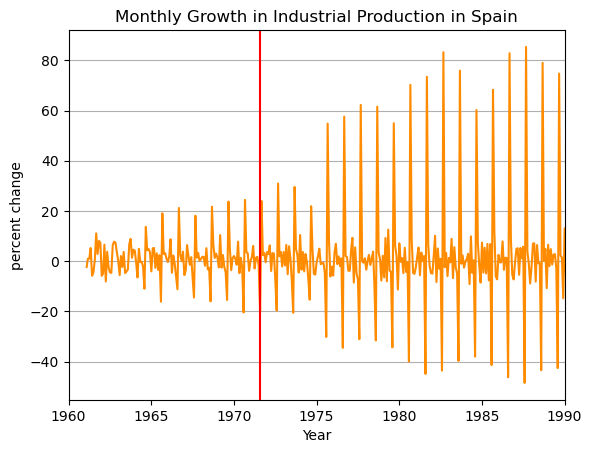

In [67]:
#plotting the monthly growth in indyustrial production
plt.plot(sp_us_df['Month'], sp_us_df['Industrial_Production_Monthly_Growth'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Monthly Growth in Industrial Production in Spain')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 1, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.xlabel('Year')
plt.ylabel('percent change')
plt.savefig('figures/Industrial_Production_Monthly_Growth.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

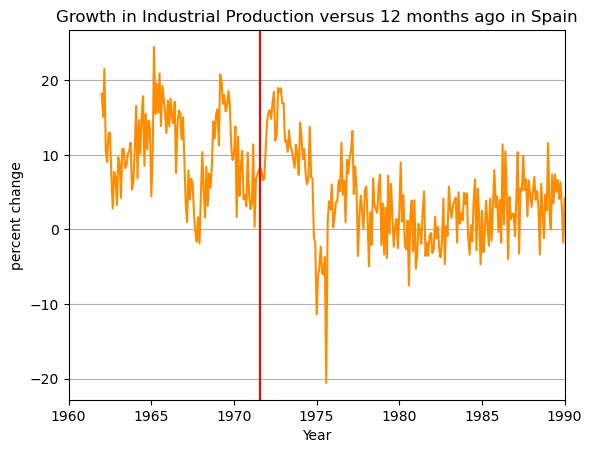

In [68]:
#plotting the 12 monthly growth in indyustrial production
plt.plot(sp_us_df['Month'], sp_us_df['Industrial_Production_12_Monthly_Growth'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Growth in Industrial Production versus 12 months ago in Spain')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 1, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.xlabel('Year')
plt.ylabel('percent change')
plt.savefig('figures/Industrial_Production_12_Monthly_Growth.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

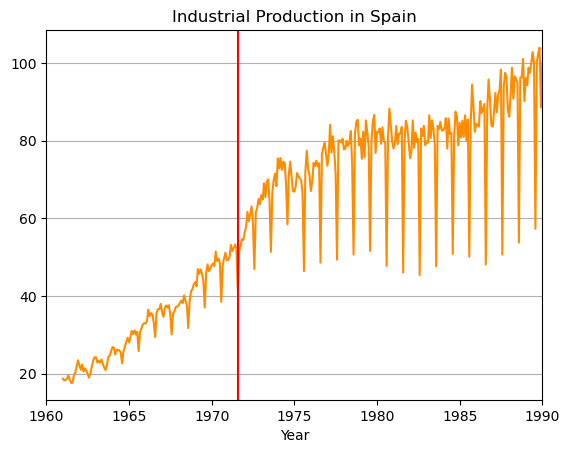

In [69]:
#plotting indyustrial production
plt.plot(sp_us_df['Month'], sp_us_df['Industrial_Production'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Industrial Production in Spain')
plt.grid(axis='y')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 1, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.xlabel('Year')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

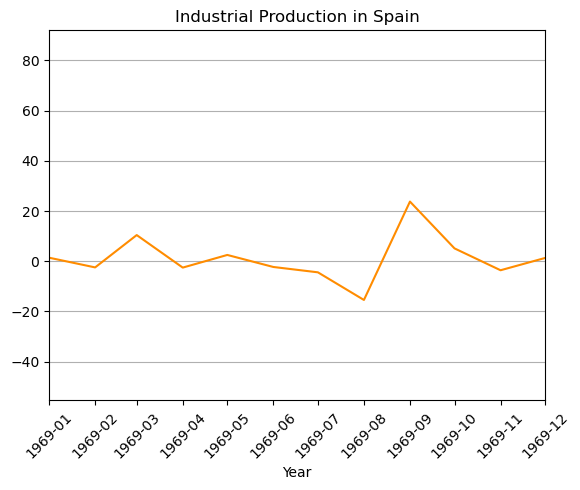

In [37]:
plt.plot(sp_us_df['Month'], sp_us_df['Industrial_Production_Monthly_Growth'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.xlim(datetime.datetime(1969, 1, 1), datetime.datetime(1969, 12, 1))
plt.xticks(rotation=45)
plt.title('Industrial Production in Spain')
plt.grid(axis='y')
plt.xlabel('Year')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

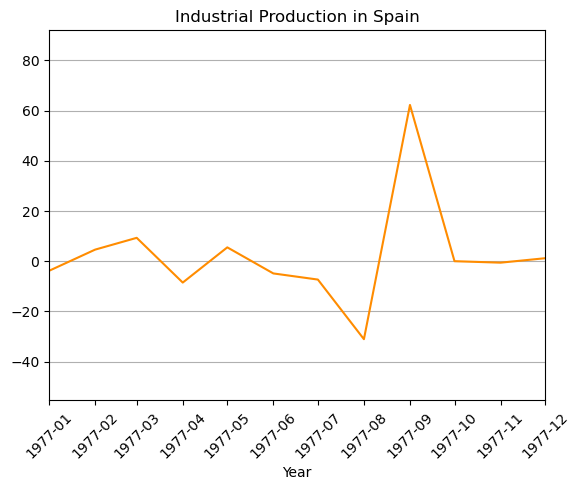

In [46]:
plt.plot(sp_us_df['Month'], sp_us_df['Industrial_Production_Monthly_Growth'], color='darkorange')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.xlim(datetime.datetime(1977, 1, 1), datetime.datetime(1977, 12, 1))
plt.xticks(rotation=45)
plt.title('Industrial Production in Spain')
plt.grid(axis='y')
plt.xlabel('Year')
plt.show

## 3. Calculating standard deviations

In [24]:
#creating a series of the standard deviation of each variable before 07/1971
std_before = sp_us_df[sp_us_df['Month'] <= datetime.datetime(1971, 7, 1)].std()[1:]
std_before

Industrial_Production                        10.414534
Nom_Exchange_Rate                             4.695948
Spain_International_Reserves                 397.91392
Spain_CPI                                      0.85775
US_International_Reserves                  1981.860312
US_CPI                                        1.502886
Nom_Exchange_Rate_Monthly_Growth              1.418761
Real_Exchange_Rate                           26.433895
Real_Exchange_Rate_Monthly_Growth             1.480185
Spain_Monthly_Inflation                        0.72305
Industrial_Production_Monthly_Growth          7.211153
Industrial_Production_12_Monthly_Growth       5.686571
Spain_International_Reserves_Index          170.778506
US_Monthly_Inflation                          0.240022
US_International_Reserves_Index               9.227354
Inflation_Difference                          0.787233
dtype: object

In [25]:
#creating a series of the standard deviation of each variable from 01/1973 onwards
std_after = sp_us_df[(sp_us_df['Month'] >= datetime.datetime(1973, 1, 1))&(sp_us_df['Month'] < datetime.datetime(1976, 1, 1))].std()[1:]
std_after

Industrial_Production                          6.17995
Nom_Exchange_Rate                             1.544085
Spain_International_Reserves                417.807818
Spain_CPI                                      1.04288
US_International_Reserves                  1242.045157
US_CPI                                        1.891975
Nom_Exchange_Rate_Monthly_Growth               1.37468
Real_Exchange_Rate                           10.472412
Real_Exchange_Rate_Monthly_Growth             1.459077
Spain_Monthly_Inflation                       0.629185
Industrial_Production_Monthly_Growth         13.676366
Industrial_Production_12_Monthly_Growth       8.317671
Spain_International_Reserves_Index           179.31666
US_Monthly_Inflation                          0.361051
US_International_Reserves_Index               5.782845
Inflation_Difference                          0.707062
dtype: object

In [26]:
#creating a series containing the ratio of the standard deviation of each variable after 01/1973 to before 07/1971
std_ratio = std_after/std_before
std_ratio

Industrial_Production                      0.593397
Nom_Exchange_Rate                          0.328812
Spain_International_Reserves               1.049995
Spain_CPI                                  1.215833
US_International_Reserves                  0.626707
US_CPI                                     1.258895
Nom_Exchange_Rate_Monthly_Growth            0.96893
Real_Exchange_Rate                         0.396174
Real_Exchange_Rate_Monthly_Growth          0.985739
Spain_Monthly_Inflation                    0.870182
Industrial_Production_Monthly_Growth       1.896557
Industrial_Production_12_Monthly_Growth    1.462687
Spain_International_Reserves_Index         1.049995
US_Monthly_Inflation                       1.504241
US_International_Reserves_Index            0.626707
Inflation_Difference                       0.898161
dtype: object

## 4. Calculating means

In [27]:
#creating a series of the mean of each variable before 07/1971
mean_before = sp_us_df[sp_us_df['Month'] <= datetime.datetime(1971, 7, 1)].mean()[1:]
mean_before

Industrial_Production                        33.401447
Nom_Exchange_Rate                             63.23741
Spain_International_Reserves               1150.933453
Spain_CPI                                     4.006624
US_International_Reserves                  16545.87518
US_CPI                                        15.14069
Nom_Exchange_Rate_Monthly_Growth              0.120773
Real_Exchange_Rate                           244.27744
Real_Exchange_Rate_Monthly_Growth            -0.120742
Spain_Monthly_Inflation                       0.484613
Industrial_Production_Monthly_Growth          1.071306
Industrial_Production_12_Monthly_Growth      10.516942
Spain_International_Reserves_Index          493.962855
US_Monthly_Inflation                          0.238714
US_International_Reserves_Index              77.036028
Inflation_Difference                          0.245898
dtype: object

In [28]:
#creating a series of the mean of each variable from 01/1973 onwards
mean_after = sp_us_df[(sp_us_df['Month'] >= datetime.datetime(1973, 1, 1))&(sp_us_df['Month'] < datetime.datetime(1976, 1, 1))].mean()[1:]
mean_after

Industrial_Production                         68.774249
Nom_Exchange_Rate                               57.7845
Spain_International_Reserves                6197.435582
Spain_CPI                                      7.853624
US_International_Reserves                  14964.963701
US_CPI                                        22.551598
Nom_Exchange_Rate_Monthly_Growth              -0.163658
Real_Exchange_Rate                            167.03718
Real_Exchange_Rate_Monthly_Growth             -0.611522
Spain_Monthly_Inflation                        1.201156
Industrial_Production_Monthly_Growth           1.132549
Industrial_Production_12_Monthly_Growth        4.908354
Spain_International_Reserves_Index          2659.843597
US_Monthly_Inflation                           0.744713
US_International_Reserves_Index               69.675454
Inflation_Difference                           0.456443
dtype: object

In [29]:
#creating a series containing the ratio of the mean of each variable after 01/1973 to before 07/1971
mean_ratio = mean_after/mean_before
mean_ratio

Industrial_Production                       2.05902
Nom_Exchange_Rate                          0.913771
Spain_International_Reserves               5.384704
Spain_CPI                                   1.96016
US_International_Reserves                  0.904453
US_CPI                                      1.48947
Nom_Exchange_Rate_Monthly_Growth          -1.355091
Real_Exchange_Rate                         0.683801
Real_Exchange_Rate_Monthly_Growth          5.064695
Spain_Monthly_Inflation                    2.478591
Industrial_Production_Monthly_Growth       1.057166
Industrial_Production_12_Monthly_Growth    0.466709
Spain_International_Reserves_Index         5.384704
US_Monthly_Inflation                       3.119684
US_International_Reserves_Index            0.904453
Inflation_Difference                       1.856228
dtype: object

## 4. Displaying the full merged dataset

In [30]:
#set 999 as the maximum number of rows of a dataframe to display
pd.options.display.max_rows = 999

Here is our entire dataset.

In [31]:
sp_us_df

,Month,Industrial_Production,Nom_Exchange_Rate,Spain_International_Reserves,Spain_CPI,US_International_Reserves,US_CPI,Nom_Exchange_Rate_Monthly_Growth,Real_Exchange_Rate,Real_Exchange_Rate_Monthly_Growth,Spain_Monthly_Inflation,Industrial_Production_Monthly_Growth,Industrial_Production_12_Monthly_Growth,Spain_International_Reserves_Index,US_Monthly_Inflation,US_International_Reserves_Index,Inflation_Difference
0,1960-01-01,NaN,60.000000,233.000000,2.857368,21478.100000,13.436946,NaN,282.153680,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000,NaN
1,1960-02-01,NaN,60.000000,253.000000,2.855049,21395.700000,13.482806,0.000000,283.346534,0.422768,-0.081128,NaN,NaN,108.583691,0.341297,99.616353,-0.422425
2,1960-03-01,NaN,60.000000,299.000000,2.851573,21344.700000,13.482806,0.000000,283.691987,0.121919,-0.121770,NaN,NaN,128.326180,0.000000,99.378902,-0.121770
3,1960-04-01,NaN,60.000000,326.000000,2.853891,21278.000000,13.528666,0.000000,284.425709,0.258633,0.081292,NaN,NaN,139.914163,0.340136,99.068353,-0.258844
4,1960-05-01,NaN,60.000000,360.000000,2.845198,21234.300000,13.528666,0.000000,285.294743,0.305540,-0.304609,NaN,NaN,154.506438,0.000000,98.864890,-0.304609
5,1960-06-01,NaN,60.000000,406.000000,2.842878,21169.800000,13.574526,0.000000,286.495380,0.420841,-0.081515,NaN,NaN,174.248927,0.338983,98.564584,-0.420498
6,1960-07-01,NaN,60.000000,427.000000,2.841719,20999.400000,13.574526,0.000000,286.612290,0.040807,-0.040791,NaN,NaN,183.261803,0.000000,97.771218,-0.040791
7,1960-08-01,NaN,60.000000,455.000000,2.847516,20803.400000,13.574526,0.000000,286.028803,-0.203581,0.203996,NaN,NaN,195.278970,0.000000,96.858661,0.203996
8,1960-09-01,NaN,60.000000,479.000000,2.864902,20430.000000,13.574526,0.000000,284.292960,-0.606877,0.610582,NaN,NaN,205.579399,0.000000,95.120146,0.610582
9,1960-10-01,NaN,60.000000,527.000000,2.872438,20068.200000,13.666246,0.000000,285.462974,0.411552,0.263041,NaN,NaN,226.180258,0.675676,93.435639,-0.412635
